# Introduction
此份資料由SHANSHAN Lu上傳至kaggle，內容為2018年8月3日日時於indeed.com所爬蟲下約7000筆關於data scientist的職缺資料。
由於未來我也希望前往歐美國家任職數據分析/資料科學等相關職位，因此選擇這份資料為研究資料。雖然其已經有一定年代，但我仍認為能透過EDA以及文本分析分析出好的洞察並帶來有利的資訊。

In [1]:
import numpy as np
import pandas as pd 
import missingno as msno
import re
import matplotlib.pyplot as plt
import string

## Data Preparation 

本數據共有6964行，並有5個列：包括position, company, description, reviews, location。

In [2]:
df = pd.read_csv('/Users/apple/Desktop/alldata.csv')
df.head(5)

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [3]:
df.info() #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [4]:
df.shape

(6964, 5)

## Data Cleaning

資料清理部分主要進行兩個流程：檢查/處理缺失值以及location列的資料剖析。

In [5]:
df.isnull().sum() 

position         11
company          11
description      11
reviews        1638
location         11
dtype: int64

In [6]:
columns = pd.DataFrame(df.isnull().sum(), columns =['missing_counts'])
columns['% missing_counts'] = df.isnull().sum()/df.shape[0]
columns

,missing_counts,% missing_counts
position,11,0.00158
company,11,0.00158
description,11,0.00158
reviews,1638,0.23521
location,11,0.00158


<AxesSubplot: >

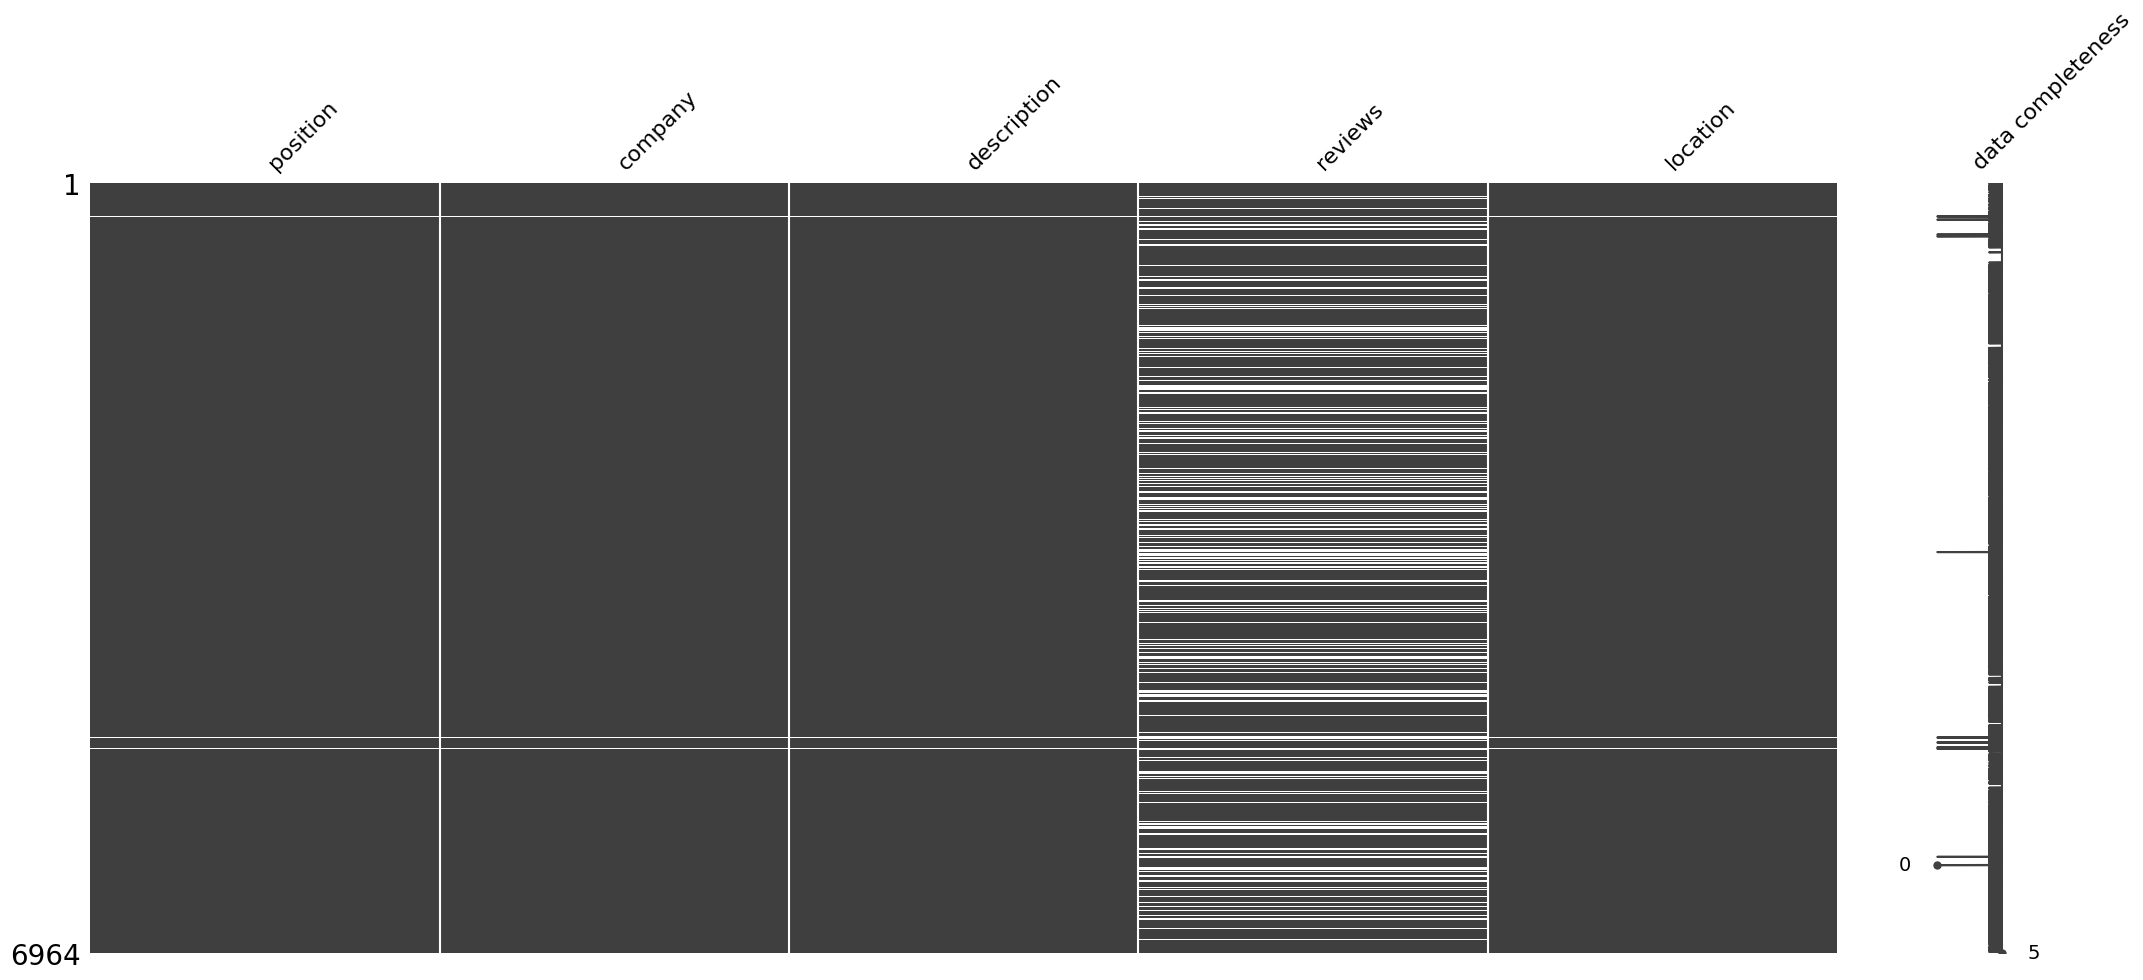

In [7]:
msno.matrix(df,  labels= True) #Visualize the missing values through missingno

缺失值部分以reviews columns 的缺失數量最為嚴重，其他columns的缺失值相對來說少很多，且透過圖可判斷這些缺失值皆為同一樣本。縱上述針對缺失值處理，reviews的部分因缺失數量眾多且分析作用不大，因此選擇全部刪除，其餘缺失值則選drop掉。

In [8]:
df.drop(columns='reviews', inplace= True) #delete 'reviews' column
df


,position,company,description,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA"
...,...,...,...,...
6959,Data Developer / Machine Learning Analyst,NetApp,Are you data-driven? We at NetApp believe in t...,"Sunnyvale, CA"
6960,Scientist I,"Pharmacyclics, an Abbvie Company",Pharmacyclics is committed to the development ...,"Sunnyvale, CA"
6961,Intern Scientist,Oath Inc,"Oath, a subsidiary of Verizon, is a values-led...","Sunnyvale, CA"
6962,Senior Data & Applied Scientist,Microsoft,We are the Bing Core Relevance team responsibl...,"Sunnyvale, CA"


In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

position       0
company        0
description    0
location       0
dtype: int64

另外location的部分，資料為合併資料 ‘city' + 'state & zipcode' .為了更好的分析，我打算將zipcode先刪除，並將其餘資料(city & state)分為[city]以及[state]兩欄.

In [11]:
df['location'] = df.location.apply(lambda x: re.sub('\d*','',str(x)))
df['city'] = df.location.apply(lambda x : x.split(',')[0].strip())
df['state'] = df.location.apply(lambda x : x.split(',')[1].strip())
df['location'] = df['city'] + ', ' +df['state']
df.head()

/var/folders/lm/kq19jbl510l_x734z3gw9fvc0000gn/T/ipykernel_44403/3668840679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location'] = df.location.apply(lambda x: re.sub('\d*','',str(x)))
/var/folders/lm/kq19jbl510l_x734z3gw9fvc0000gn/T/ipykernel_44403/3668840679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df.location.apply(lambda x : x.split(',')[0].strip())
/var/folders/lm/kq19jbl510l_x734z3gw9fvc0000gn/T/ipykernel_44403/3668840679.py:3: SettingWithCopyWarning: 
A value is t

,position,company,description,location,city,state
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,"Atlanta, GA",Atlanta,GA
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...","Atlanta, GA",Atlanta,GA
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...","Atlanta, GA",Atlanta,GA
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,"Atlanta, GA",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,"Atlanta, GA",Atlanta,GA


# Exploratory Data Analysis

探索式資料分析部分將透過pandas分析並由matplotlib進行資料視覺化，該部分將針對以下問題進行研究。
- 在搜索'Data scientist'職缺的情況下，前15名一同出現的職缺為何？
- 哪幾間公司招募最多資料科學家相關的職缺？
- 哪些地區擁有最多的工作機會？
- (按職務劃分)哪些城市/州開出最多工作機會？

### 1. 在搜索'Data scientist'職缺的情況下，前15名一同出現的職缺為何？

In [12]:
df['position'].value_counts()[:15]

Data Scientist               351
Senior Data Scientist         96
Research Analyst              64
Data Engineer                 60
Machine Learning Engineer     56
Lead Data Scientist           31
Research Scientist            30
Sr. Data Scientist            28
Principal Data Scientist      24
Software Engineer             22
Data Analyst                  22
Quantitative Analyst          21
Product Manager               17
Scientist                     17
Bioinformatics Scientist      16
Name: position, dtype: int64

<AxesSubplot: title={'center': 'Top 15 jobs when searching Data Scientist position'}>

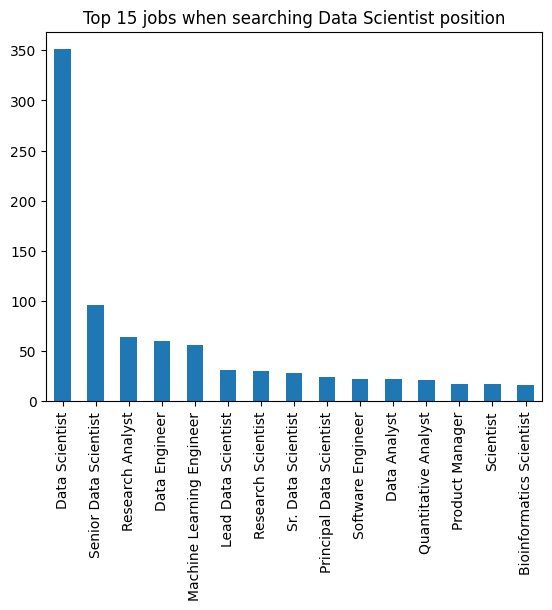

In [13]:
df['position'].value_counts()[:15].plot(kind='bar', title='Top 15 jobs when searching Data Scientist position')

### 2. 哪幾間公司招募最多資料科學家相關的職缺？

In [14]:
df['company'].value_counts()

Amazon.com            358
Ball Aerospace        187
Microsoft             137
Google                134
NYU Langone Health     77
                     ... 
Milacron LLC            1
FabFitFun               1
Greenlots               1
Science 37              1
Whiterabbit.ai          1
Name: company, Length: 2213, dtype: int64

<AxesSubplot: title={'center': 'Top 15 Companies that hire the most data scientist job'}>

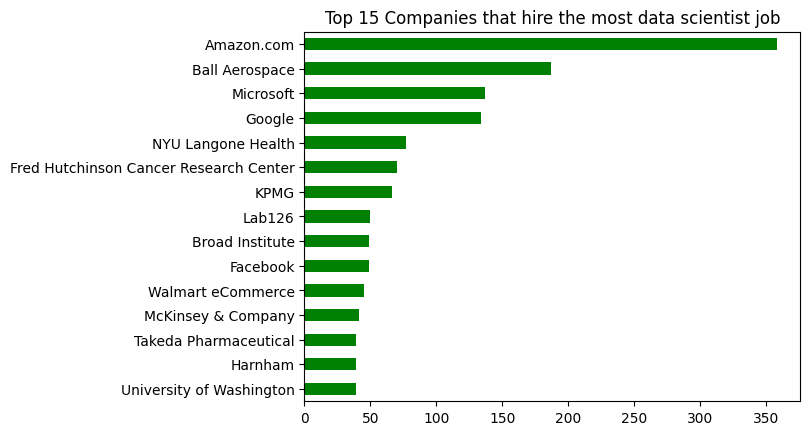

In [15]:
dfp = df['company'].value_counts()[:15].sort_values(ascending=True)
dfp.plot(kind='barh', color= 'g', title='Top 15 Companies that hire the most data scientist job')

根據上圖可看出Amazon招募最多的資料科學相關職缺，其次依序為Ball Aerospace, Microsoft, Google以及NYU Langone Health等公司。

### 3. 哪些地區擁有最多的工作機會？

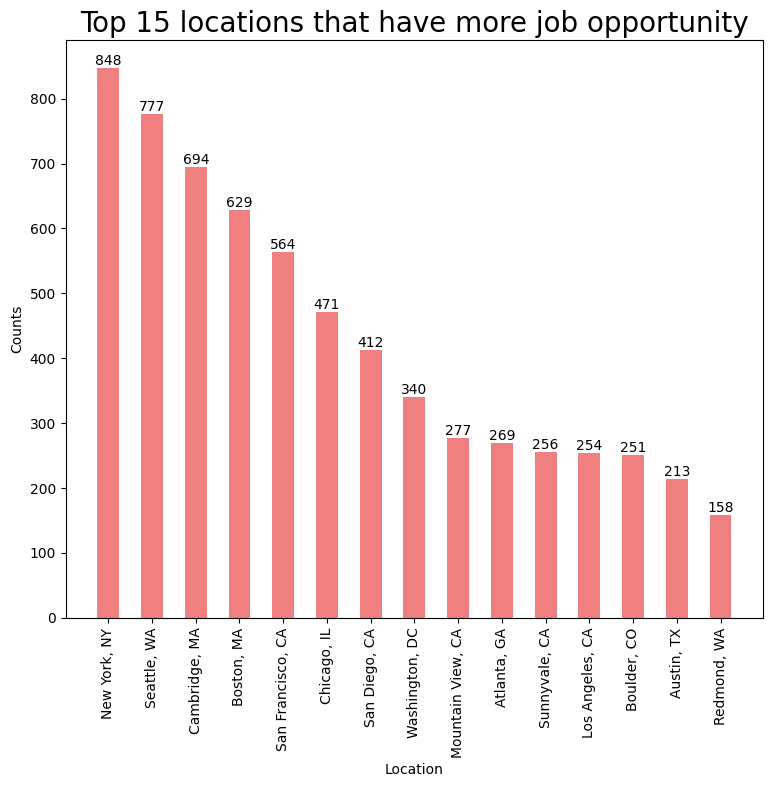

In [16]:
x1 = df['location'].value_counts()[:15].index.tolist() 
y1 = df['location'].value_counts()[:15].values.tolist()

plt.figure(figsize= (9, 7.5))

p1 = plt.bar(x1, y1, width=0.5, color=['LightCoral'])

plt.xticks(rotation ='vertical')
plt.xlabel('Location')
plt.ylabel('Counts')
plt.title('Top 15 locations that have more job opportunity', fontsize= 20 )
plt.bar_label(p1, labels = y1, padding = 0.2) 
# labels = 數據標籤列表, label_type = center和edge(默認edge), padding = 數據標籤與每個bar的水平距離


plt.show()


前五名擁有最多職缺機會的城市分別為New York, Seatle, Cambridge, Boston以及San Francisco。

### 4.(按職務劃分)哪些城市/州開出最多工作機會？

- 以城市做分析

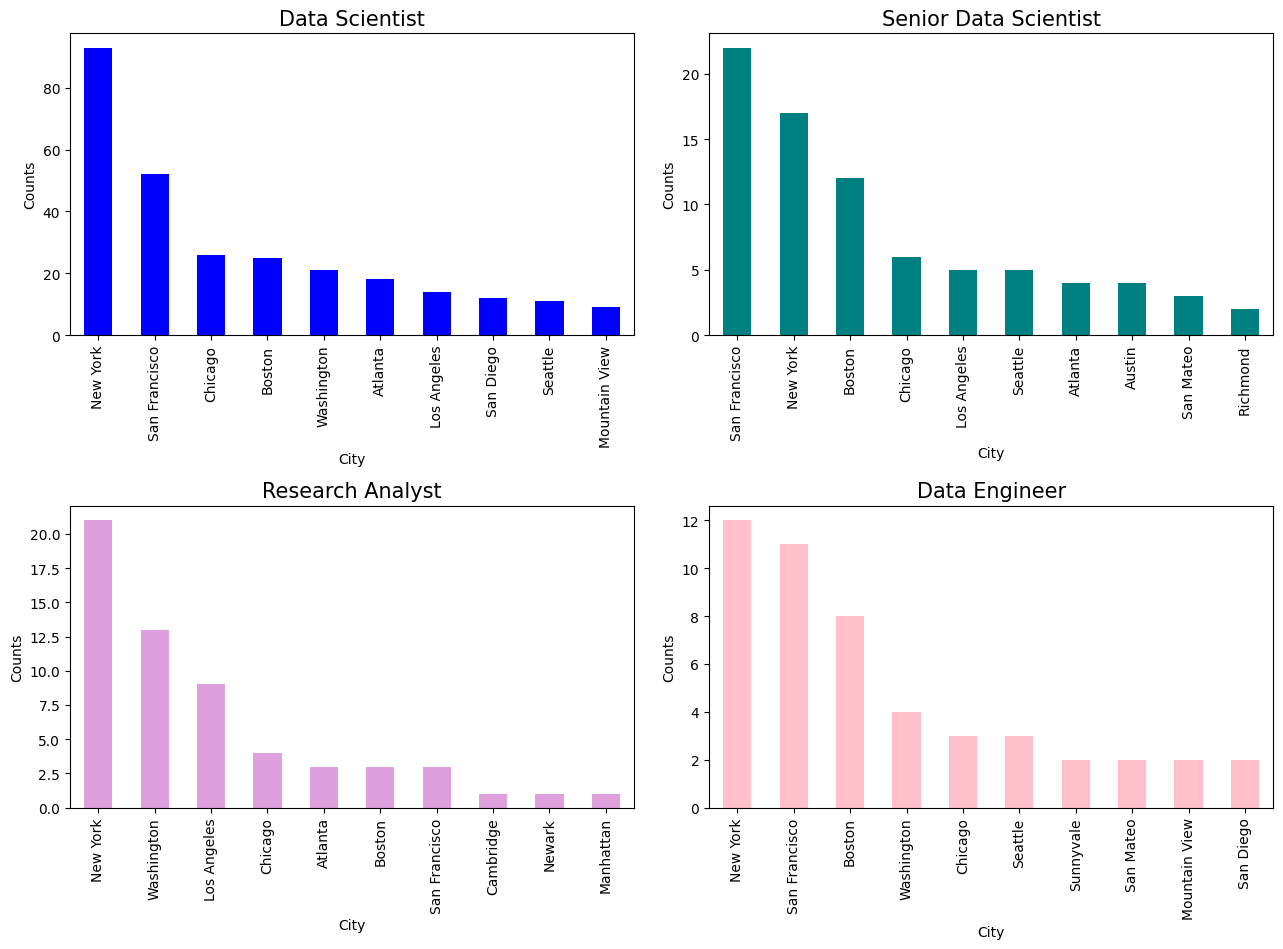

In [17]:

ds_df = df[df['position'] =='Data Scientist']
sds_df = df[df['position'] =='Senior Data Scientist']
ra_df = df[df['position'] =='Research Analyst']
de_df = df[df['position'] =='Data Engineer']
# 先將所需職位的data篩選出來

ds1 = ds_df['city'].value_counts()[:10]
sds1 = sds_df['city'].value_counts()[:10]
ra1 = ra_df['city'].value_counts()[:10]
de1 = de_df['city'].value_counts()[:10]

i = 1
color = ['Blue','Teal','Plum','Pink' ]
dataset = [ds1, sds1, ra1, de1]
position = ['Data Scientist','Senior Data Scientist','Research Analyst','Data Engineer']

for x in dataset:
    plt.subplot(2, 2, i)
    i += 1
    x.plot(kind= 'bar', width=0.5, color = color[i - 2])

    plt.xticks(rotation ='vertical')
    plt.xlabel('City')
    plt.ylabel('Counts')
    plt.title(position[i - 2], fontsize= 15 )

plt.tight_layout(rect=(1, 1, 3, 3))

plt.show()

- 以data scientist, research analyst以及data engineer三種職位來說, New York的工作機會最多。
- 而senior data scientist則為San Francisco工作機會最多，New York次之。

- 以州作分析

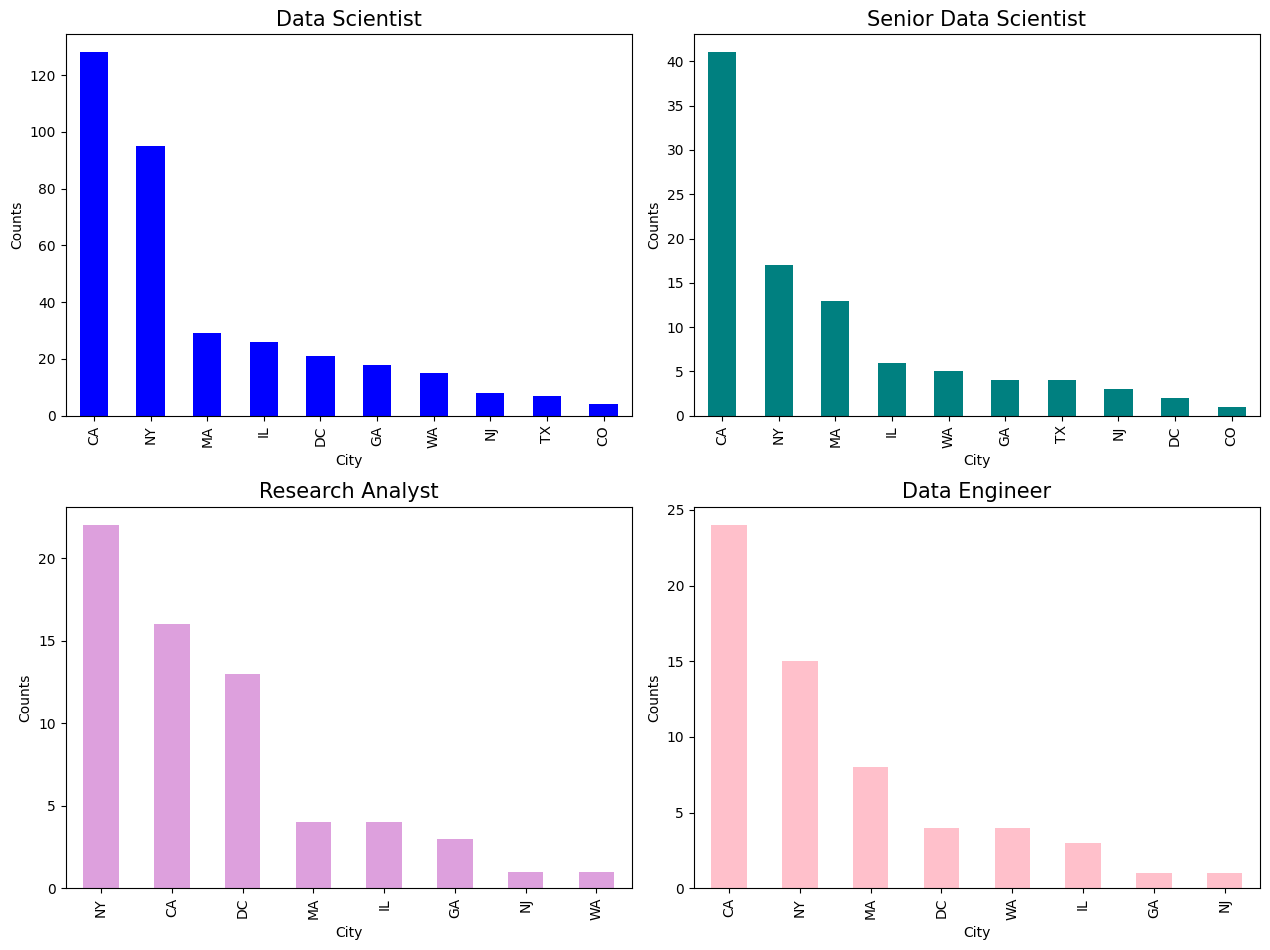

In [18]:
ds1 = ds_df['state'].value_counts()[:10]
sds1 = sds_df['state'].value_counts()[:10]
ra1 = ra_df['state'].value_counts()[:10]
de1 = de_df['state'].value_counts()[:10]

i = 1
color = ['Blue','Teal','Plum','Pink' ]
dataset = [ds1, sds1, ra1, de1]
position = ['Data Scientist','Senior Data Scientist','Research Analyst','Data Engineer']

for x in dataset:
    plt.subplot(2, 2, i)
    i += 1
    x.plot(kind= 'bar', width=0.5, color = color[i - 2])

    plt.xticks(rotation ='vertical')
    plt.xlabel('City')
    plt.ylabel('Counts')
    plt.title(position[i - 2], fontsize= 15 )

plt.tight_layout(rect=(1, 1, 3, 3))

plt.show()

- 以data scientist, senior data scientist以及data engineer三種職位來說, Calfornia的工作機會最多。
- 以research analyst來說則為New York的工作機會最多，Calfornia次之。

# Text Analysis

此部分針對資料中'description'列進行文字分析進行文本分析。並將透過資料中詳細的說明挖掘/研究以下兩點問題。
- 資料科學相關工作所要求的年資大概都是幾年？
- 工作中哪些應具備技能被要求最多？

### 文本資料處理

In [19]:
#將description 合併 by position
des_df= df.groupby('position').agg(lambda x :' '.join(x))
des_df = des_df[['description']]
des_df

,description
position,
(Contract) Business Intelligence Analyst,The Role:\nWe are looking for an experienced B...
"(Contract) Research Associate, Delivery Innovation",Moderna Therapeutics(Contract) Research Associ...
"(Senior) Associate Scientist, Hematopoietic Stem Cell Biology","At Intellia, we are revolutionizing medicine b..."
(Senior) Data Scientist,DUTIES AND RESPONSIBILITES:\nDevelop robust an...
(Senior) PHC Data Scientist - Real World Data Neuroscience,POSITION SUMMARY\n\nAs a (Senior) Data Scienti...
...,...
Zillow Offers - Software Development Engineer,About the team\nWe are looking for a strong te...
data scientist / machine learning engineer,"International Information Technology Team, Inc..."
eCommerce Analytics Director/Data Scientist,UNTUCKit was founded in 2011 based on the idea...


### 文本分析

### 1. 資料科學相關工作所要求的年資大概都是幾年？

In [20]:
text = des_df['description'].values

In [21]:
year_list = []
for t in text:
    #將遍歷的行照'\n'分割成句子
    for sentance in t.split('\n'):
        if 'experience' in sentance:
            #匹配工作年數（出現‘experience‘並找到包含1到2個數字以及可選的＋符號和year字串的句子）
            #'\d'為任意數字, {1,2}為前面數字可出現1到2次,'\+?'為＋號可出現可不出現
            match = re.search(r'(\d{1,2})\+? year', sentance)
            if match:
                # 将匹配到的工作经验年数添加到 experience_req 列表中
                year_list.append(int(match.group(1)))

排除異常值（工作經驗要求超過20年的)

In [22]:
year_list = [year for year in year_list if year <= 20]

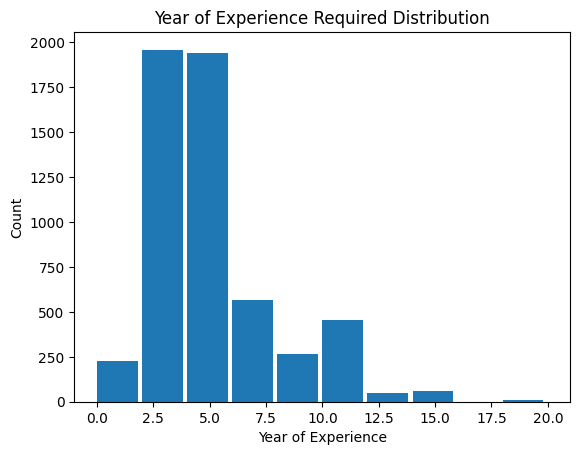

The average year of experience required is 4.79 years


In [23]:
plt.hist(year_list, width = 1.8)

plt.xlabel('Year of Experience')
plt.ylabel('Count')
plt.title('Year of Experience Required Distribution')
plt.show()

print(f'The average year of experience required is {round(np.mean(year_list), 2)} years')

從結果中可了解，多數職缺要求2~5年左右的相關經驗。而平均來說會要求4.79年左右的經驗。

### 2.工作中哪些應具備工具/ 技能被要求最多？

In [24]:
text2 = df['description'].values

In [25]:
#創建函數創建函數，以計算text2中中匹配到reg的數量
def count_skills(reg,text2):
    count = 0
    for t in text2:
        if re.search(reg, t):
            count+=1
    return count

### 使用工具

In [26]:
#創建dataframe，包含skills（技能名稱）以及skills_reg(技能的正則表達式)
Tools = ['Python', 'R','C++', 'SQL', 'Tableau', 'Power BI', 
         'Java', 'Algorithm', 'Visualization', 'Hadoop','Oracle', 'Agile','Excel' ]
tools_reg = ['(?i)\WPython\W', '\WR\W+\s*','\WC\+\+\s*','(?i)SQL\w*', '(?i)\WTableau\W?', '(?i)\WPower\s?BI\W?', 
             '(?i)Java\w*', '(?i)\WAlgorithms?\W?', '(?i)\WVisualization\W?', '(?i)\WHadoop\W?','(?i)\WOracle\W', 
             '(?i)\WAgile\W?','(?i)\WExcel\W?' ]
hards_df = pd.DataFrame({'tool': Tools, 'reg':tools_reg})
hards_df

,tool,reg
0,Python,(?i)\WPython\W
1,R,\WR\W+\s*
2,C++,\WC\+\+\s*
3,SQL,(?i)SQL\w*
4,Tableau,(?i)\WTableau\W?
5,Power BI,(?i)\WPower\s?BI\W?
6,Java,(?i)Java\w*
7,Algorithm,(?i)\WAlgorithms?\W?
8,Visualization,(?i)\WVisualization\W?
9,Hadoop,(?i)\WHadoop\W?


In [27]:
hards_df['count'] = hards_df['reg'].map(lambda x: count_skills(x, text2))
hards_df['ptg'] = round(hards_df['count']/len(text2), 2)
hards_df = hards_df.sort_values(by=['ptg'], ascending = False)
hards_df

,tool,reg,count,ptg
12,Excel,(?i)\WExcel\W?,3473,0.50
0,Python,(?i)\WPython\W,2822,0.41
1,R,\WR\W+\s*,2187,0.31
3,SQL,(?i)SQL\w*,1924,0.28
7,Algorithm,(?i)\WAlgorithms?\W?,1703,0.24
6,Java,(?i)Java\w*,1397,0.20
8,Visualization,(?i)\WVisualization\W?,1015,0.15
2,C++,\WC\+\+\s*,966,0.14
9,Hadoop,(?i)\WHadoop\W?,923,0.13
11,Agile,(?i)\WAgile\W?,698,0.10


/var/folders/lm/kq19jbl510l_x734z3gw9fvc0000gn/T/ipykernel_44403/2504304073.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  pic.set_xticklabels(['{:.0%}'.format(x) for x in pic.get_xticks()])


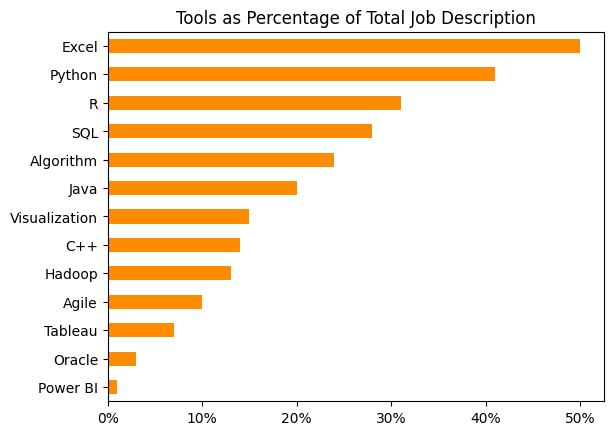

In [28]:
x = hards_df.sort_values(by=['ptg'])
pic = x['ptg'].plot(kind = 'barh', color = ['DarkOrange'])
pic.set_yticklabels(x['tool'])
pic.set_title('Tools as Percentage of Total Job Description')
pic.set_xticklabels(['{:.0%}'.format(x) for x in pic.get_xticks()])
plt.show()

由結果可知，大部分企業所要求的前5項工具分別為:Excel, Pyhton, R, SQL, Algorithm。
其中有三項皆為語言類型(Pyhton, R, SQL)，另兩項則分別為試算表軟體以及思考流程，透過此結果可分析：我若想要申請data scientist相關職缺，除了最為基本且最常使用的excel，應該也要具備Python使用的能力配合上演算法的思維邏輯。

### 技術能力

In [29]:
skills_list = ['machine learning','data analysis','data visualization',
            'modeling','statistical analysis','deep learning',
            'optimization','decision tree','logistic','random forest',
            'ab testing','web scraping','neural network','interpersonal skills',
            'communication skills','artificial intelligence']
skills_reg = ['(?i)\Wmachine\slearning\W','(?i)\Wdata\sanalysis\W', '(?i)\Wdata\svisualization\W', '(?i)\Wmodeling\W','(?i)\Wstatistical\sanalysis\W', '(?i)\Wdeep\slearning\W', 
            '(?i)\Woptimization\W', '(?i)\Wdecision\stree\W', '(?i)\Wlogistic\W', '(?i)\Wrandom\sforest\W', '(?i)\Wab\stesting\W', '(?i)\Wweb\sscraping\W',
            '(?i)\Wneural\snetwork\W', '(?i)\Winterpersonal\sskills\W', '(?i)\Wcommunication\sskills\W', '(?i)\Wartificial\sintelligence\W']

In [30]:
softskill = pd.DataFrame({'skillname':skills_list, 'skill_reg':skills_reg})
softskill['count'] = softskill['skill_reg'].map(lambda x: count_skills(x, text2))
softskill['ptg'] = round(softskill['count']/len(text2), 2)
softskill = softskill.sort_values(by=['ptg'], ascending = False)
softskill


,skillname,skill_reg,count,ptg
14,communication skills,(?i)\Wcommunication\sskills\W,2577,0.37
0,machine learning,(?i)\Wmachine\slearning\W,2447,0.35
3,modeling,(?i)\Wmodeling\W,1625,0.23
1,data analysis,(?i)\Wdata\sanalysis\W,1399,0.20
6,optimization,(?i)\Woptimization\W,980,0.14
4,statistical analysis,(?i)\Wstatistical\sanalysis\W,598,0.09
5,deep learning,(?i)\Wdeep\slearning\W,588,0.08
13,interpersonal skills,(?i)\Winterpersonal\sskills\W,582,0.08
2,data visualization,(?i)\Wdata\svisualization\W,478,0.07
15,artificial intelligence,(?i)\Wartificial\sintelligence\W,482,0.07


/var/folders/lm/kq19jbl510l_x734z3gw9fvc0000gn/T/ipykernel_44403/646731293.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  pic.set_xticklabels(['{:.0%}'.format(x) for x in pic.get_xticks()])


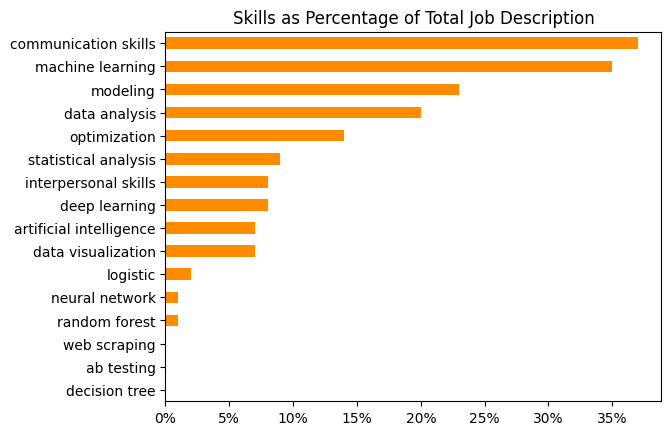

In [31]:
x = softskill.sort_values(by=['ptg'])
pic = x['ptg'].plot(kind = 'barh', color = ['DarkOrange'])
pic.set_yticklabels(x['skillname'])
pic.set_title('Skills as Percentage of Total Job Description')
pic.set_xticklabels(['{:.0%}'.format(x) for x in pic.get_xticks()])
plt.show()

由結果可知，前五項最為重要的技能分別為：communication skills, machine learning, modeling, data analysis, optimization. communication skill最為排行第一名令人訝異卻也理所當然，不管是資料分析師、資料科學家等都需要有良好的溝通能力，以溝通需求、溝通需求、拆解以及分析問題。而在這之後，才是透過機器學習、技術能力建立模型並優化以解決問題。

# Conclusion
透過一系列的分析，我總結以下幾點洞察。
- 若未來作為data scientist前往美國發展，可選擇前往Calafornia 以及New York這兩州發展，而其中New York, Boston, San Francisco等城市或許會有更多機會。
- 企業所要求的年資多為2.5~5年左右，我目前應該以尋找相關職缺（如數據分析、產品分析、資料科學）的實習工作以及多完成一些專案報告以累積經驗能力。
- 多虧工作關係excel的部分已經非常熟練，我應該透過課程、專案等練習持續精進Python以及SQL的使用，目前的話以熟悉機器學習為目標。
- 溝通能力是工作中最重要的軟實力，因此我應該更好的學習如何表達出問題、需求、分析點等。而在這之後是machine learning 以及modelng，熟悉這兩部分才能更好的在工作中有所產出。